<a href="https://colab.research.google.com/github/M0STAFA1/ADAS_Ai/blob/main/Person_Detaction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Aug  6 05:37:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image


# %cd {HOME}
# Image(filename='/content/tee3.jpg', height=600)

In [5]:
# %cd {HOME}
# !yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/tee3.jpg' save=True

In [6]:
# %cd {HOME}
# Image(filename='/content/runs/detect/predict/tee3.jpg', height=600)

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yUzL0Xpqnq0hK6Vuqv1f")
project = rf.workspace("alyssonmachado").project("people-dataset-oq6vh")
version = project.version(4)
dataset = version.download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to people-dataset-4 in yolov8:: 100%|██████████| 15261/15261 [00:02<00:00, 6219.67it/s]


In [8]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data=/content/datasets/people-dataset-4/data.yaml optimizer = 'auto' epochs=35 batch = -1 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 257MB/s]
New https://pypi.org/project/ultralytics/8.2.73 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/people-dataset-4/data.yaml, epochs=35, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1722922833.76aa84f77158.1525.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4150.jpg  weights
P_curve.png					    train_batch4151.jpg
PR_curve.png					    train_batch4152.jpg


/content


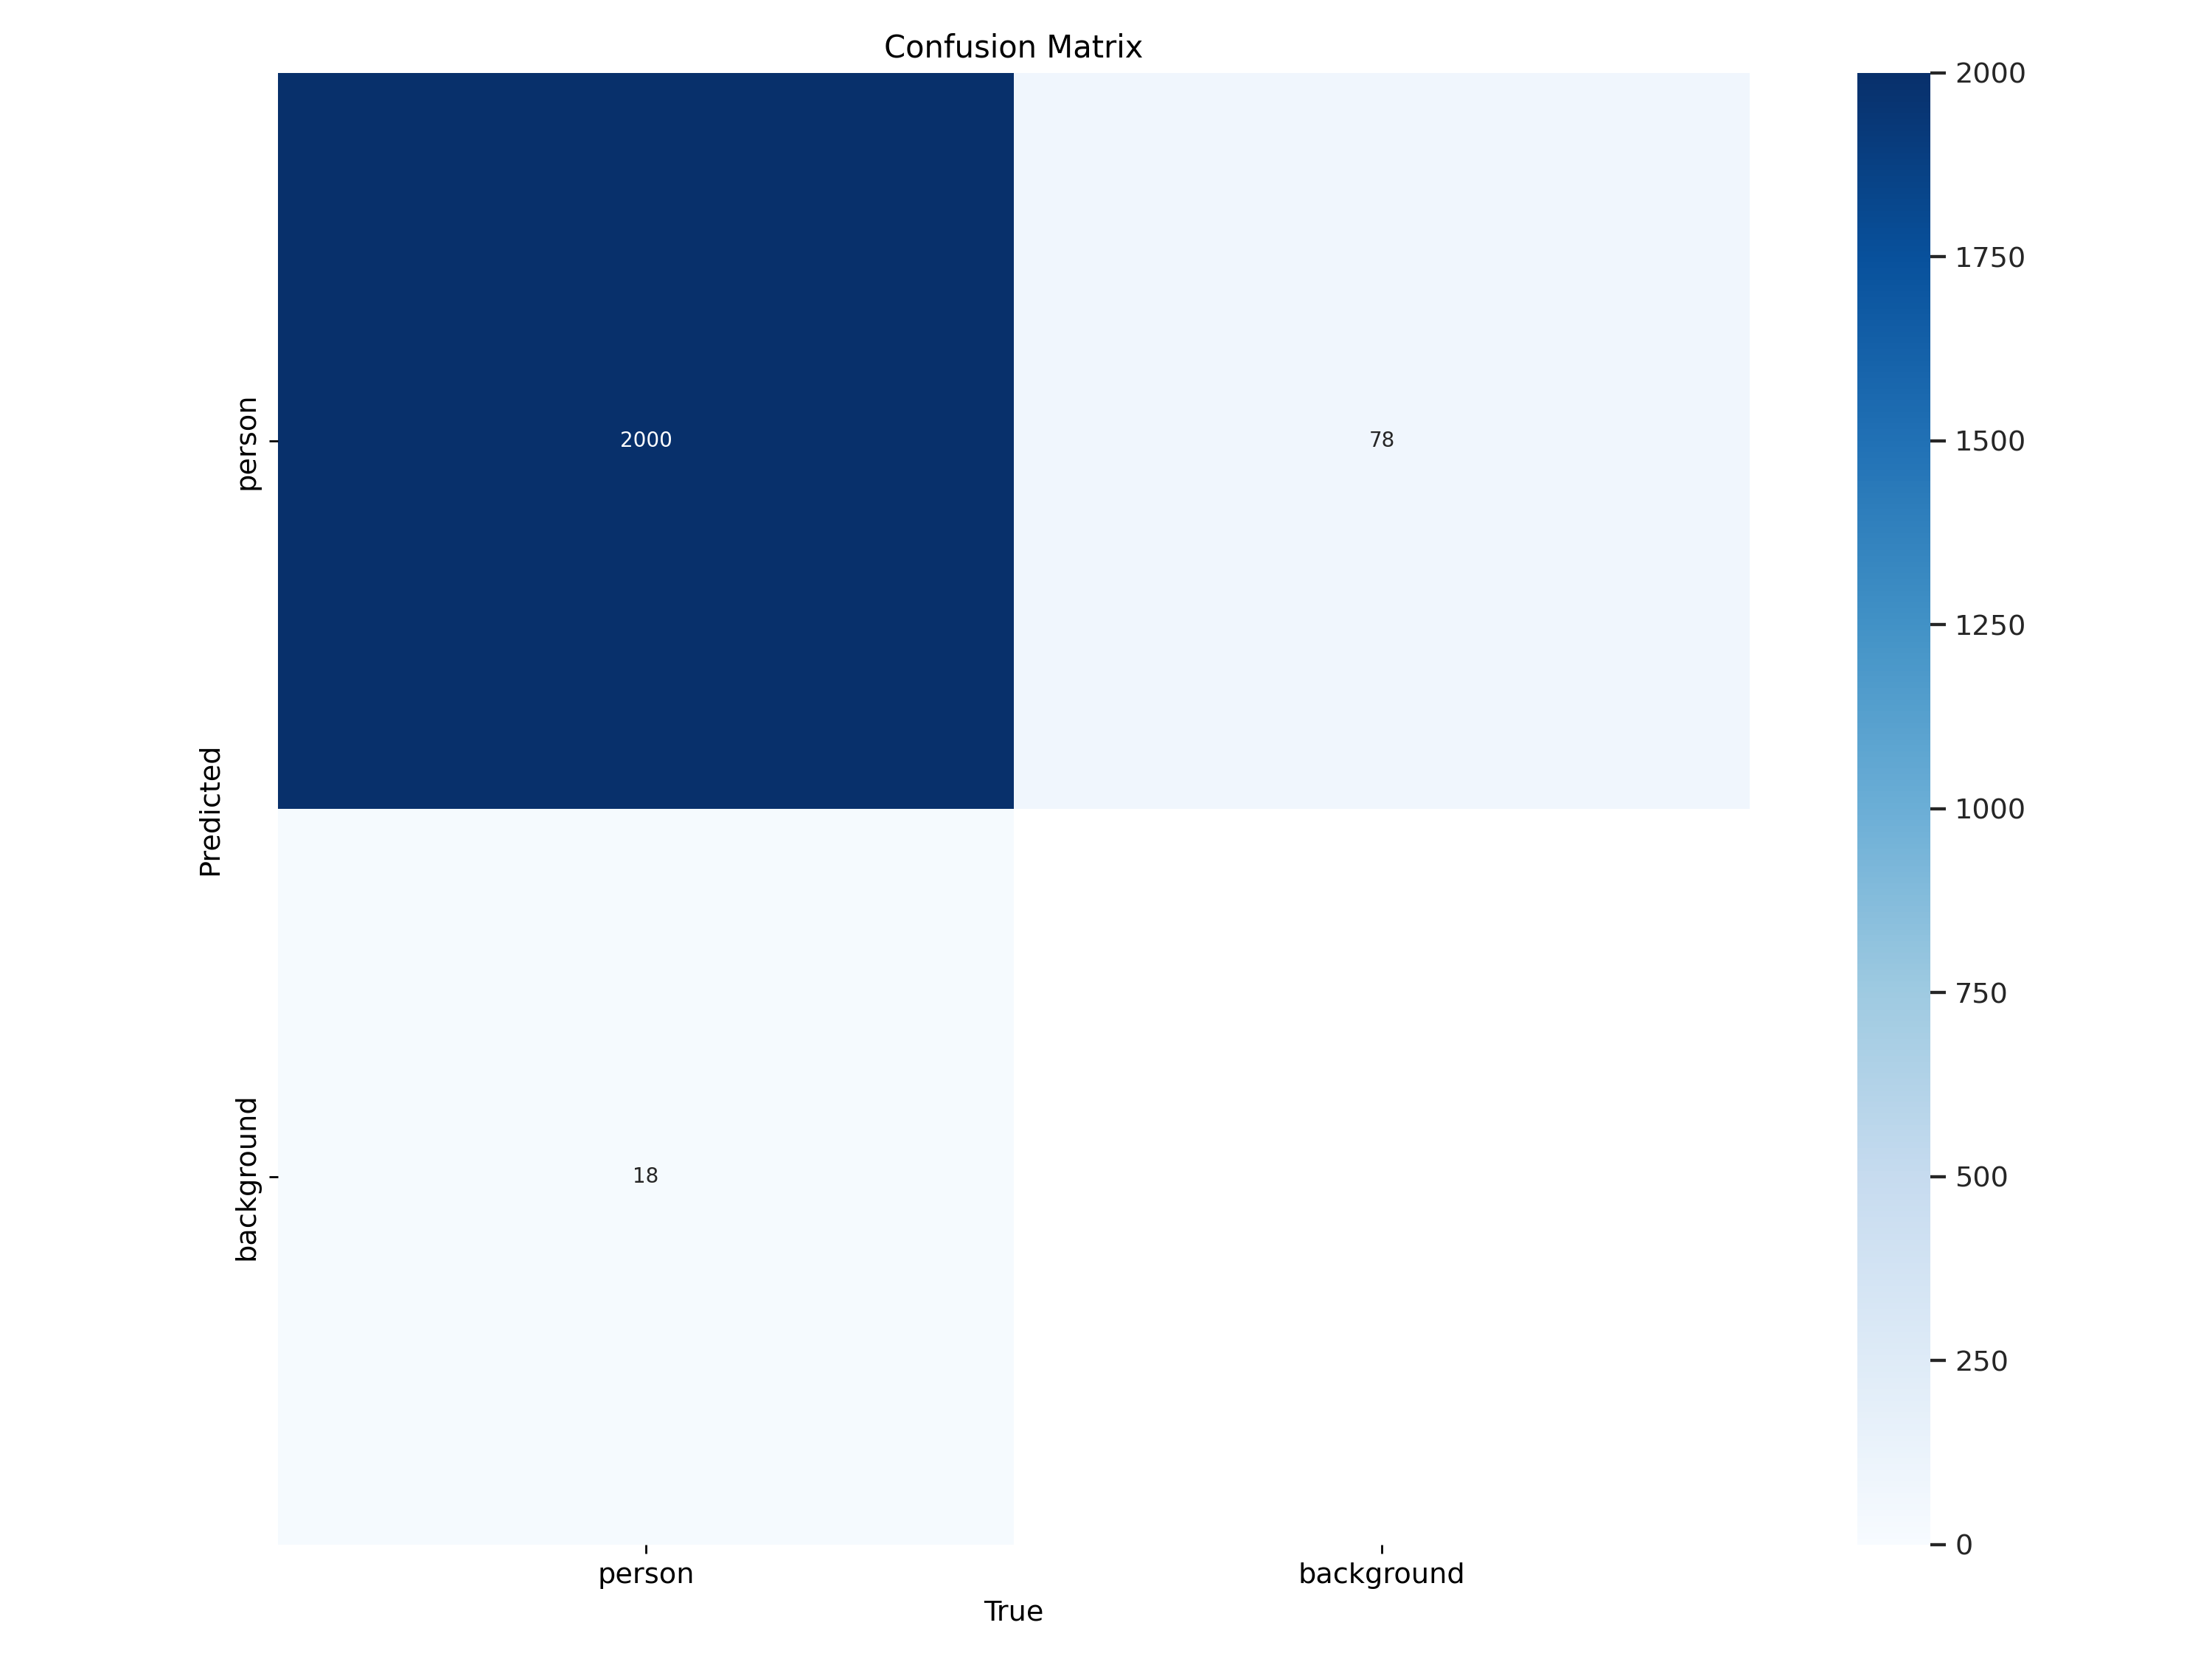

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


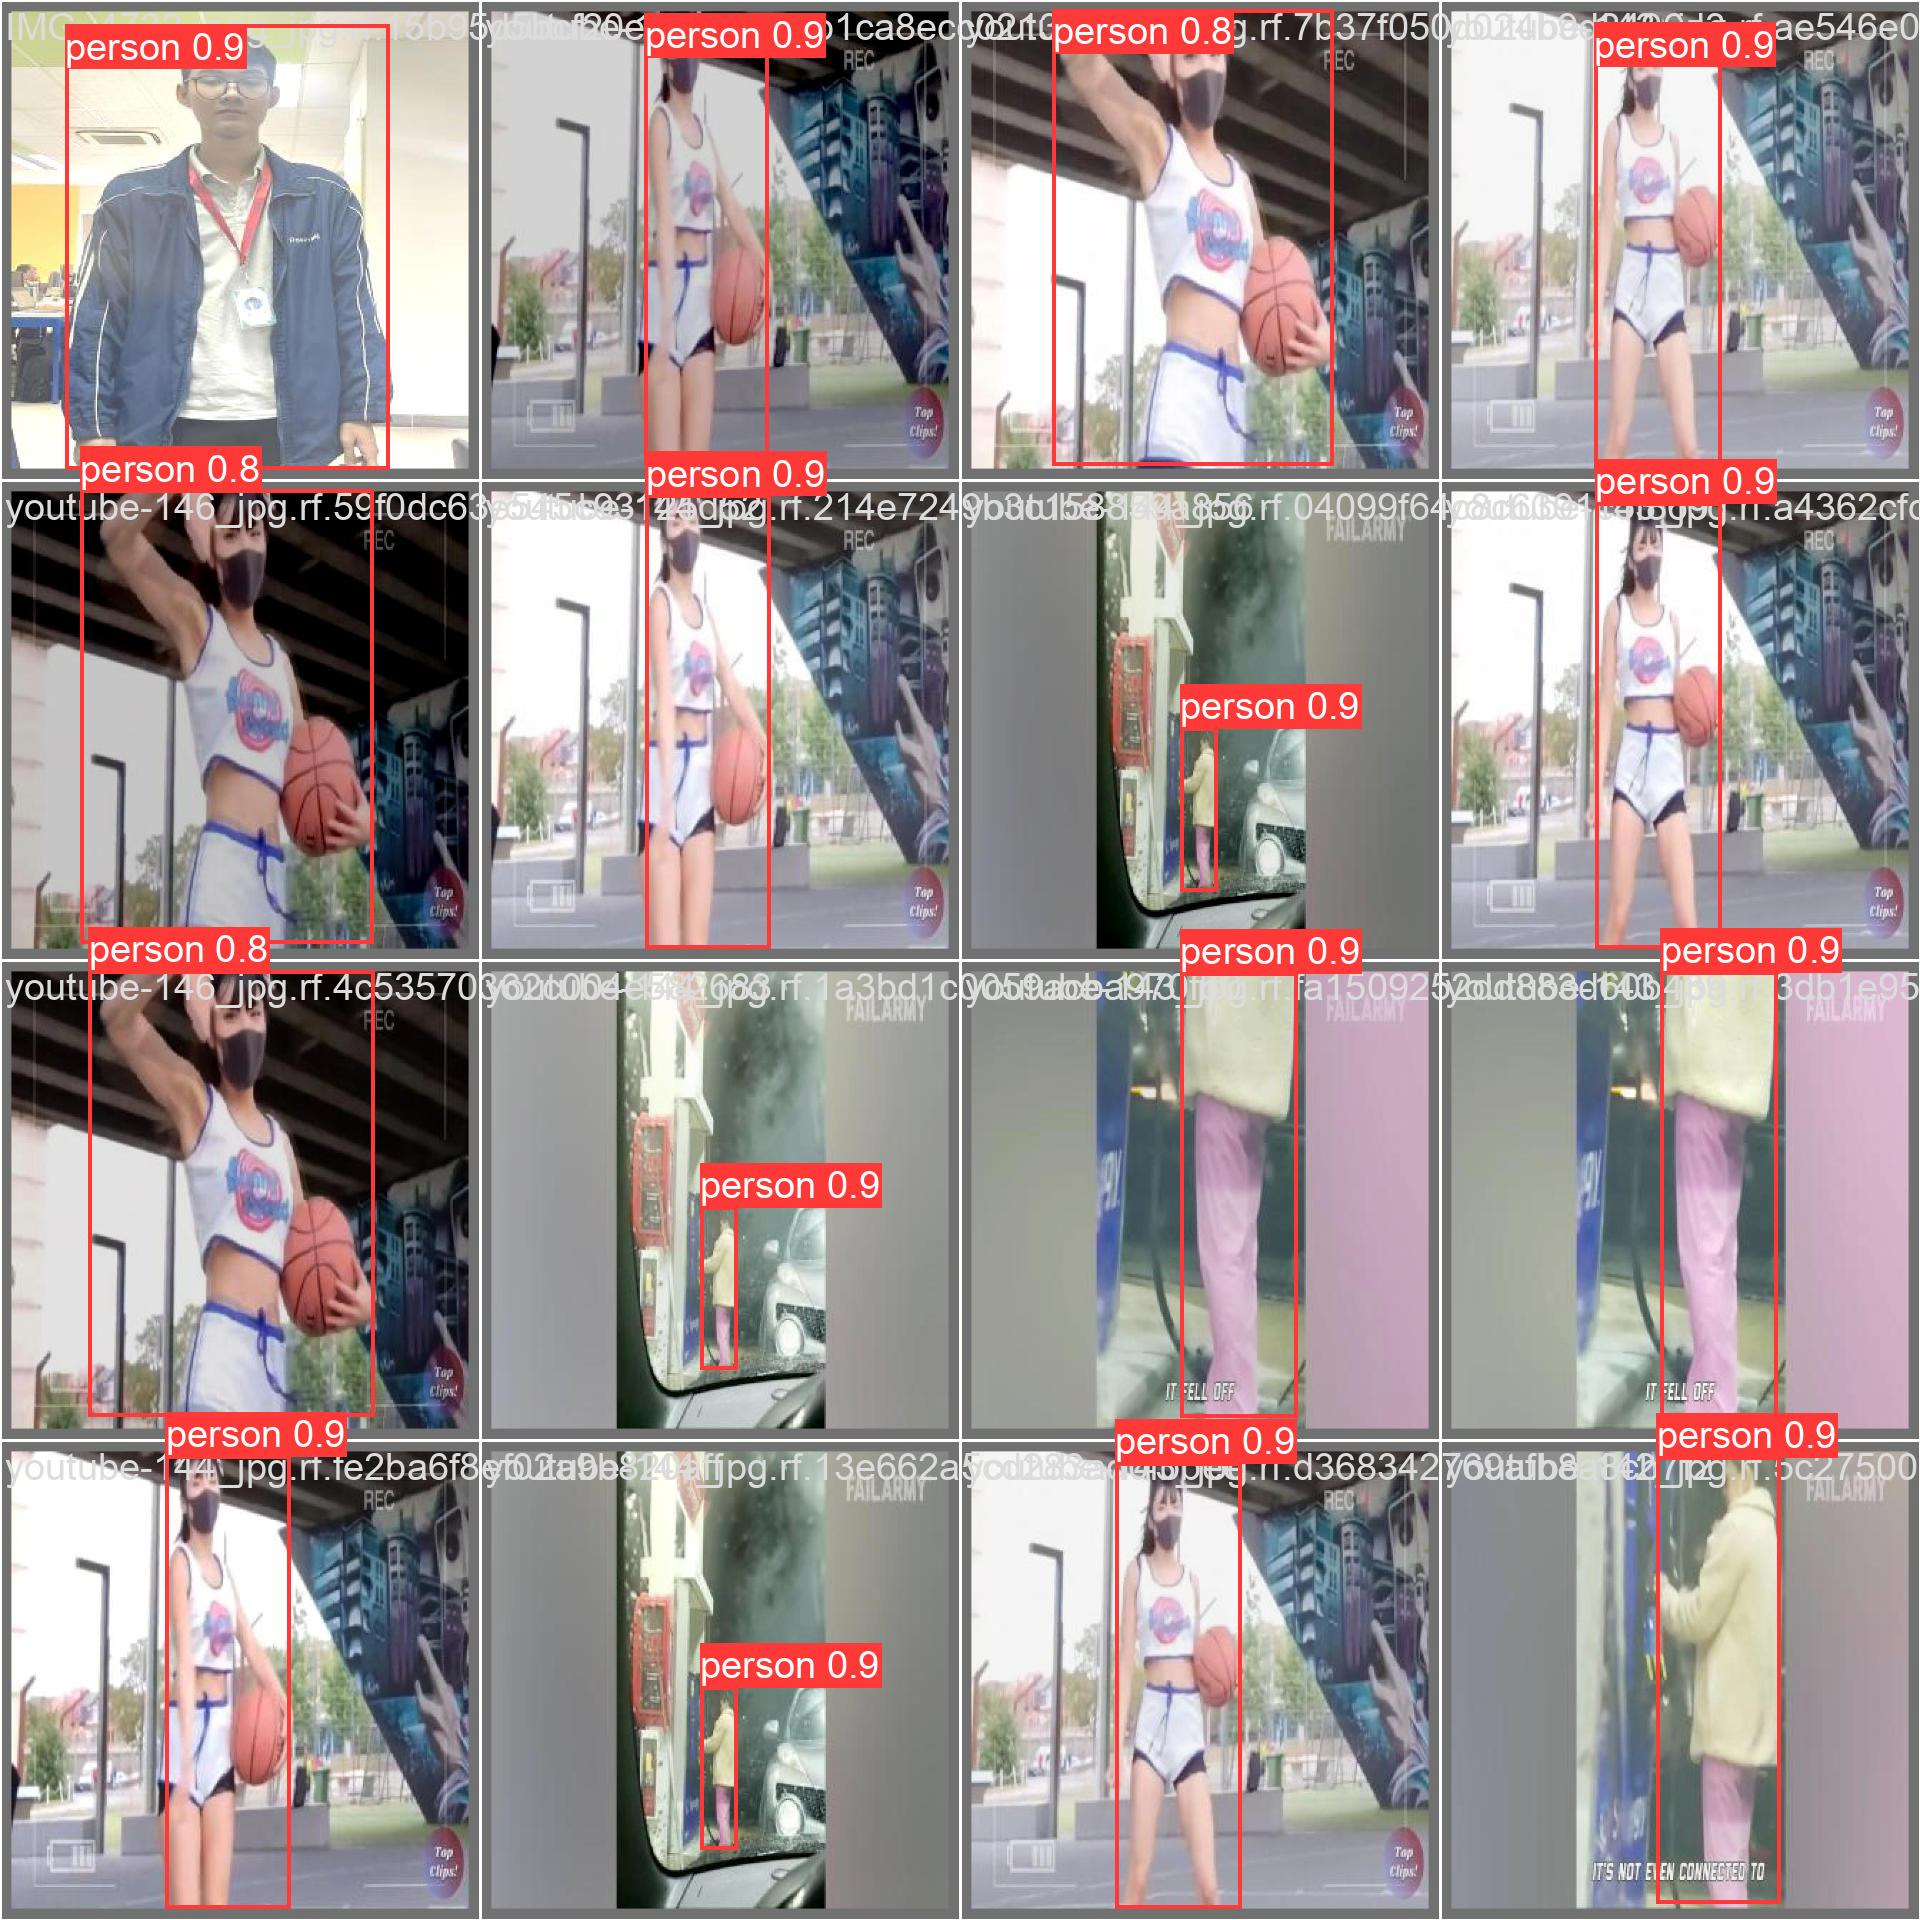

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/people-dataset-4/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/people-dataset-4/valid/labels.cache... 1318 images, 0 backgrounds, 0 corrupt: 100% 1318/1318 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 83/83 [00:19<00:00,  4.32it/s]
                   all       1318       2018      0.985      0.977      0.993      0.873
Speed: 0.5ms preprocess, 8.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [14]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/p1.mp4 save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/345) /content/p1.mp4: 384x640 12 persons, 79.1ms
video 1/1 (2/345) /content/p1.mp4: 384x640 13 persons, 10.8ms
video 1/1 (3/345) /content/p1.mp4: 384x640 15 persons, 13.5ms
video 1/1 (4/345) /content/p1.mp4: 384x640 11 persons, 10.8ms
video 1/1 (5/345) /content/p1.mp4: 384x640 13 persons, 10.7ms
video 1/1 (6/345) /content/p1.mp4: 384x640 11 persons, 10.8ms
video 1/1 (7/345) /content/p1.mp4: 384x640 11 persons, 10.7ms
video 1/1 (8/345) /content/p1.mp4: 384x640 10 persons, 11.0ms
video 1/1 (9/345) /content/p1.mp4: 384x640 9 persons, 10.8ms
video 1/1 (10/345) /content/p1.mp4: 384x640 11 persons, 10.8ms
video 1/1 (11/345) /content/p1.mp4: 384x640 12 persons, 19.3ms
video 1/1 (12/345) /content/p1.mp4: 384x640 12 persons, 10.8ms
video 1/1 (13/345) /content/p1.mp4: 384x640 15 persons, 12.5ms
video 1/1 (14/345) /c

In [ ]:
# %cd {HOME}
# !yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/tee2.jpg' save=True